# Importing libraries and files

In [1]:

# Import Libraries
import pandas as pd
import numpy as np
import os
from dask import dataframe as dd

import matplotlib.pyplot as plt
import seaborn as sns

import datetime
from dateutil.relativedelta import relativedelta


In [2]:

ReadCSV = True

# Import original dataset
FileName = "PD dementia 23-09-21.csv"
Path = r"O:\GIRFT DiRAC\FlavienHardy\1_DataConsistency\Data\0_Raw\21.09"
FilePath = os.path.join(Path, FileName)

ReadCSV = True
if ReadCSV:
    df_ini = pd.read_csv(FilePath)
    
print('Columns:')
print(df_ini.columns)

print('Size of dataset:', df_ini.shape)
df_ini.head()


Columns:
Index(['P_Spell_ID1', 'Epikey', 'procedure_group', 'sex', 'EPIstart', 'EPIend',
       'HESID1', 'epiorder', 'ProvCode', 'Sitecode', 'LSOA_2011_Code',
       'main_specialty_code', 'Main_Specialty_Description', 'age_of_patient',
       'diagnosis_group', 'POD', 'MORT', 'FinY', 'Read30', 'Read90',
       'Admission_date1', 'Discharge_date1', 'Spell_Los'],
      dtype='object')
Size of dataset: (193391, 23)


,P_Spell_ID1,Epikey,procedure_group,sex,EPIstart,EPIend,HESID1,epiorder,ProvCode,Sitecode,...,age_of_patient,diagnosis_group,POD,MORT,FinY,Read30,Read90,Admission_date1,Discharge_date1,Spell_Los
0,1421,7.009250e+11,-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-...,Male,04/09/2020 00:00,05/09/2020 00:00,00007773EC3BDCAF9441AFA32057315D,1,RTD,RTD02,...,81,R410~E86X~R630~G20X~F067~G473~I679~D333~Z922~Z...,EM,0,2020/21,NaN,NaN,04/09/2020 00:00,18/09/2020 00:00,14
1,1421,7.009250e+11,-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-...,Male,05/09/2020 00:00,07/09/2020 00:00,00007773EC3BDCAF9441AFA32057315D,2,RTD,RTD02,...,81,R410~R441~E86X~R630~D529~E559~G20X~F067~I951~M...,EM,0,2020/21,NaN,NaN,04/09/2020 00:00,18/09/2020 00:00,14
2,1421,7.009250e+11,U051~Y973~Y981~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-...,Male,07/09/2020 00:00,18/09/2020 00:00,00007773EC3BDCAF9441AFA32057315D,3,RTD,RTD01,...,81,G20X~F023~R410~R441~R630~D529~E559~I951~M549~G...,EM,0,2020/21,NaN,NaN,04/09/2020 00:00,18/09/2020 00:00,14
3,8786,5.027000e+11,-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-...,Female,03/07/2014 00:00,12/07/2014 00:00,0002CF863631188C9524321D4710EF31,1,RAJ,RDDH0,...,88,N390~U898~N182~G20XD~F023A~K590~R33X~R600~R680...,EM,0,2014/15,NaN,NaN,03/07/2014 00:00,17/07/2014 00:00,14
4,8786,5.027000e+11,-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-1~-...,Female,12/07/2014 00:00,17/07/2014 00:00,0002CF863631188C9524321D4710EF31,2,RAJ,RDDH0,...,88,N390~U898~N182~G20XD~F023A~K590~R33X~R600~R680...,EM,0,2014/15,NaN,NaN,03/07/2014 00:00,17/07/2014 00:00,14


In [5]:

# Pre-process dataset: rename and reorganise features, convert date features
# --------------------------------------------------
def PreProcessing(df_ini):
    df = df_ini.copy()
    
    df = df.rename(columns={'P_Spell_ID1':'P_Spell_ID', 
                                    'HESID1':'HESID',
                                    'Admission_date1':'Admission_date',
                                    'Discharge_date1':'Discharge_date'})
    
    DateFeatures = ['Admission_date', 'Discharge_date', 'EPIstart', 'EPIend']
    for date in DateFeatures:
        df.loc[:, date] = pd.to_datetime( df.loc[:, date], format='%d/%m/%Y %H:%M' )

    ColumnList = ['P_Spell_ID', 'HESID', 'LSOA_2011_Code',
                  'Admission_date', 'Discharge_date', 'EPIstart', 'EPIend',
                  'diagnosis_group',
                  'Spell_Los', 'sex', 'age_of_patient',
                  'ProvCode', 'MORT', 'Read30', 'Read90']

    df = df.loc[:, ColumnList]
    
    return df
# --------------------------------------------------

df = PreProcessing(df_ini)
df.head()


,P_Spell_ID,HESID,LSOA_2011_Code,Admission_date,Discharge_date,EPIstart,EPIend,diagnosis_group,Spell_Los,sex,age_of_patient,ProvCode,MORT,Read30,Read90
0,1421,00007773EC3BDCAF9441AFA32057315D,E01008446,2020-09-04,2020-09-18,2020-09-04,2020-09-05,R410~E86X~R630~G20X~F067~G473~I679~D333~Z922~Z...,14,Male,81,RTD,0,NaN,NaN
1,1421,00007773EC3BDCAF9441AFA32057315D,E01008446,2020-09-04,2020-09-18,2020-09-05,2020-09-07,R410~R441~E86X~R630~D529~E559~G20X~F067~I951~M...,14,Male,81,RTD,0,NaN,NaN
2,1421,00007773EC3BDCAF9441AFA32057315D,E01008446,2020-09-04,2020-09-18,2020-09-07,2020-09-18,G20X~F023~R410~R441~R630~D529~E559~I951~M549~G...,14,Male,81,RTD,0,NaN,NaN
3,8786,0002CF863631188C9524321D4710EF31,E01021334,2014-07-03,2014-07-17,2014-07-03,2014-07-12,N390~U898~N182~G20XD~F023A~K590~R33X~R600~R680...,14,Female,88,RAJ,0,NaN,NaN
4,8786,0002CF863631188C9524321D4710EF31,E01021334,2014-07-03,2014-07-17,2014-07-12,2014-07-17,N390~U898~N182~G20XD~F023A~K590~R33X~R600~R680...,14,Female,88,RAJ,0,NaN,NaN


# Identify instances of disappearing dementia codes

In [6]:

# Test for presence of mandatory dementia codes
# --------------------------------------------------
def ICD10_Dementia(df_ini):
    df = df_ini.copy()
    
    CodesDementia_Categories = "F00|F01|F02"
    CodesDementia_Unspecified = "F03|F051"
    Codes_Dementia_SubCategories = "F000|F001|F002|F009|F010|F011|F012|F013|F018|F019|F020|F021|F022|F023|F024|F028"
    Codes_Dementia_Supp = "G301|G302|G308|G309"
    CodesDementia = CodesDementia_Categories + "|" + CodesDementia_Unspecified + "|" + Codes_Dementia_SubCategories + "|" + Codes_Dementia_Supp
    CodesDementia_List = CodesDementia.split("|")

    # Look for ANY dementia code
    Filter = df['diagnosis_group'].str.contains(CodesDementia)
    df.loc[:, "ICD10_"+"Dementia_All"] = np.where(Filter, 1, 0)

#     # Look for individual dementia categories and subcategories
#     for code in CodesDementia_List:
#         Filter = df['diagnosis_group'].str.contains(code)
#         df.loc[:, "ICD10_"+"Dementia_"+code] = np.where(Filter, 1, 0)
            
#     # Look for Parkinson's - G20
#     Filter = df['diagnosis_group'].str.contains("G20")
#     df.loc[:, "ICD10_"+"Parkinsons_G20"] = np.where(Filter, 1, 0)

    return df
# --------------------------------------------------

df_2 = ICD10_Dementia(df)
df_2.head()


,P_Spell_ID,HESID,LSOA_2011_Code,Admission_date,Discharge_date,EPIstart,EPIend,diagnosis_group,Spell_Los,sex,age_of_patient,ProvCode,MORT,Read30,Read90,ICD10_Dementia_All
0,1421,00007773EC3BDCAF9441AFA32057315D,E01008446,2020-09-04,2020-09-18,2020-09-04,2020-09-05,R410~E86X~R630~G20X~F067~G473~I679~D333~Z922~Z...,14,Male,81,RTD,0,NaN,NaN,0
1,1421,00007773EC3BDCAF9441AFA32057315D,E01008446,2020-09-04,2020-09-18,2020-09-05,2020-09-07,R410~R441~E86X~R630~D529~E559~G20X~F067~I951~M...,14,Male,81,RTD,0,NaN,NaN,0
2,1421,00007773EC3BDCAF9441AFA32057315D,E01008446,2020-09-04,2020-09-18,2020-09-07,2020-09-18,G20X~F023~R410~R441~R630~D529~E559~I951~M549~G...,14,Male,81,RTD,0,NaN,NaN,1
3,8786,0002CF863631188C9524321D4710EF31,E01021334,2014-07-03,2014-07-17,2014-07-03,2014-07-12,N390~U898~N182~G20XD~F023A~K590~R33X~R600~R680...,14,Female,88,RAJ,0,NaN,NaN,1
4,8786,0002CF863631188C9524321D4710EF31,E01021334,2014-07-03,2014-07-17,2014-07-12,2014-07-17,N390~U898~N182~G20XD~F023A~K590~R33X~R600~R680...,14,Female,88,RAJ,0,NaN,NaN,1


In [7]:

# Select episodes with AT LEAST ONE existing mention of dementia
# --------------------------------------------------
def FindErrorsDementia(df_ini):
    df = df_ini.copy()
    
    Filter_DementiaAll = df["ICD10_Dementia_All"] == 1
    df_DementiaAll = df[Filter_DementiaAll]
    df_NoDementia = df[~Filter_DementiaAll]

    # Keep first occurence of dementia code
    Indices_FirstDementia = df_DementiaAll.groupby('HESID')['EPIend'].idxmin()
    df_DementiaFirst = df_DementiaAll.loc[Indices_FirstDementia]
    df_DementiaFirst.head()

    ColumnList = ['HESID', 'EPIend', 'ProvCode']
    df = pd.merge( df, df_DementiaFirst[ColumnList], how='left', on='HESID' )
    df = df.rename(columns={'EPIend_x':'EPIend', 'EPIend_y':'EPIend_FirstDementia',
                            'ProvCode_x':'ProvCode',
                            'ProvCode_y':'ProvCode_FirstDementia'})
    
    # Flagging episodes with previous dementia diagnosis
    # (A lof of episodes have G20X code for Parkinson's, but no code for dementia)
    Filter = df['EPIend_FirstDementia'].isnull()
    df.loc[:, 'Exist_DementiaDiagnosis'] = np.where(Filter, 0, 1)
    
    # Find errors in dataset
    Filter_Error = (df["ICD10_Dementia_All"]==0) & (df['Exist_DementiaDiagnosis']==1) & (df['EPIend_FirstDementia']<=df['EPIend'])
    df.loc[:, 'Error_Dementia'] = np.where(Filter_Error, 1, 0)

    df = df.sort_values(by=['HESID', 'EPIstart', 'EPIend'])
    
    return df
# --------------------------------------------------

df_3 = FindErrorsDementia(df_2)
df_3.head()


,P_Spell_ID,HESID,LSOA_2011_Code,Admission_date,Discharge_date,EPIstart,EPIend,diagnosis_group,Spell_Los,sex,age_of_patient,ProvCode,MORT,Read30,Read90,ICD10_Dementia_All,EPIend_FirstDementia,ProvCode_FirstDementia,Exist_DementiaDiagnosis,Error_Dementia
0,1421,00007773EC3BDCAF9441AFA32057315D,E01008446,2020-09-04,2020-09-18,2020-09-04,2020-09-05,R410~E86X~R630~G20X~F067~G473~I679~D333~Z922~Z...,14,Male,81,RTD,0,NaN,NaN,0,2020-09-18,RTD,1,0
1,1421,00007773EC3BDCAF9441AFA32057315D,E01008446,2020-09-04,2020-09-18,2020-09-05,2020-09-07,R410~R441~E86X~R630~D529~E559~G20X~F067~I951~M...,14,Male,81,RTD,0,NaN,NaN,0,2020-09-18,RTD,1,0
2,1421,00007773EC3BDCAF9441AFA32057315D,E01008446,2020-09-04,2020-09-18,2020-09-07,2020-09-18,G20X~F023~R410~R441~R630~D529~E559~I951~M549~G...,14,Male,81,RTD,0,NaN,NaN,1,2020-09-18,RTD,1,0
3,8786,0002CF863631188C9524321D4710EF31,E01021334,2014-07-03,2014-07-17,2014-07-03,2014-07-12,N390~U898~N182~G20XD~F023A~K590~R33X~R600~R680...,14,Female,88,RAJ,0,NaN,NaN,1,2014-07-12,RAJ,1,0
4,8786,0002CF863631188C9524321D4710EF31,E01021334,2014-07-03,2014-07-17,2014-07-12,2014-07-17,N390~U898~N182~G20XD~F023A~K590~R33X~R600~R680...,14,Female,88,RAJ,0,NaN,NaN,1,2014-07-12,RAJ,1,0


In [8]:

# Count number of errors
# --------------------------------------------------
def CountErrors(df_ini):
    df = df_ini.copy()
    
    # Keep episodes with existing dementia diagnosis (e.g. no G20X only episodes)
    Filter = df['Exist_DementiaDiagnosis'] == 1
    Filter_NotFirst = (df['EPIend'] - df['EPIend_FirstDementia']).dt.days > 0
    df = df[Filter & Filter_NotFirst]

    Sum = df['Error_Dementia'].sum()
    Count = df['Error_Dementia'].shape[0]
    Prop = 100 * Sum / Count
    
    return Sum, Count, Prop

# --------------------------------------------------

Sum, Count, Prop = CountErrors(df_3)
print('Number of errors:', Sum)
print('Number of subsequent episodes where dementia codes should be used:', Count)
print('Proportion of errors: %0.2f' % Prop, '%')



Number of errors: 41278
Number of subsequent episodes where dementia codes should be used: 155997
Proportion of errors: 26.46 %


# Engineer features of interest

In [9]:

# Feature Engineering
# --------------------------------------------------
def FeatureEngineering(df_ini):
    df_3 = df_ini.copy()

    # Keep episodes for patients with dementia diagnosis coded at least once
    Filter = df_3['Exist_DementiaDiagnosis'] == 1
    df_Dementia = df_3[Filter]

    # Time between current EPIend and first instance of dementia code
    df_Dementia.loc[:, 'TimeDiff_FirstDementia'] = (df_Dementia['EPIend'] - df_Dementia['EPIend_FirstDementia']).dt.days

    # Whether admission in different trust, compared to original one
    Filter_ChangeProv = df_3['ProvCode_FirstDementia'] != df_3['ProvCode']
    df_Dementia.loc[:, 'ProvCode_Change'] = np.where(Filter_ChangeProv, 1, 0)

    # Whether admission in different region, compared to original one
    FileName = "ProviderRegions.xlsx"
    Path = r"O:\GIRFT DiRAC\FlavienHardy\1_DataConsistency\Data\1_Processed"
    FilePath = os.path.join(Path, FileName)
    df_TrustRegions = pd.read_excel(FilePath)

    df_Dementia = pd.merge(df_Dementia, df_TrustRegions, on='ProvCode', how='left')
    df_Dementia = pd.merge(df_Dementia, df_TrustRegions, left_on='ProvCode_FirstDementia', right_on='ProvCode', how='left')
    df_Dementia = df_Dementia.rename(columns={'region_x':'region','region_y':'region_FirstDementia',
                                              'ProvCode_x':'ProvCode'})
    df_Dementia = df_Dementia.drop(columns=['ProvCode_y'])
    df_Dementia.loc[:,'region'] = df_Dementia.loc[:,'region'].fillna('Non-NHS provider')
    df_Dementia.loc[:,'region_FirstDementia'] = df_Dementia.loc[:,'region_FirstDementia'].fillna('Non-NHS provider')

    Filter_ChangeRegion = df_Dementia['region_FirstDementia'] != df_Dementia['region']
    df_Dementia.loc[:, 'region_Change'] = np.where(Filter_ChangeRegion, 1, 0)

    # Missing age (999)
    Filter_MissingAge = df_Dementia['age_of_patient'] == 999
    df_Dementia.loc[:, 'Missing_Age'] = np.where(Filter_MissingAge, 1, 0)
    df_Dementia.head()

    # IMD scores
    FileName = "File_7_ID_2015_All_ranks__deciles_and_scores_for_the_Indices_of_Deprivation__and_population_denominators.csv"
    Path = r"O:\GIRFT DiRAC\FlavienHardy\1_DataConsistency\Data\0_Raw"
    FilePath = os.path.join(Path, FileName)
    df_IMD = pd.read_csv(FilePath)
    ColumnList = ['LSOA code (2011)', 'Index of Multiple Deprivation (IMD) Score']
    df_IMD_Sub = df_IMD[ColumnList]

    df_Dementia = pd.merge(df_Dementia, df_IMD_Sub, left_on='LSOA_2011_Code', right_on='LSOA code (2011)', how='left')
    df_Dementia = df_Dementia.drop(columns=['LSOA code (2011)'])
    df_Dementia = df_Dementia.rename(columns={'Index of Multiple Deprivation (IMD) Score':'IMD Score'})

    # Missing IMD scores
    Filter_MissingIMD = df_Dementia['IMD Score'].isnull()
    df_Dementia.loc[:, 'Missing_IMD_score'] = np.where(Filter_MissingIMD, 1, 0)
    df_Dementia['IMD Score'] = df_Dementia['IMD Score'].fillna(df_Dementia['Missing_IMD_score'].mean())

    # Coding sequences

    
    return df_Dementia
# --------------------------------------------------

df_4 = FeatureEngineering(df_3)
print('Columns:', df_4.columns)

df_4.head()

SaveCSV = False
if SaveCSV:
    df_4.to_csv(r"O:\GIRFT DiRAC\FlavienHardy\1_DataConsistency\Data\1_Processed\Dementia_FlaggedErrors.csv")



Columns: Index(['P_Spell_ID', 'HESID', 'LSOA_2011_Code', 'Admission_date',
       'Discharge_date', 'EPIstart', 'EPIend', 'diagnosis_group', 'Spell_Los',
       'sex', 'age_of_patient', 'ProvCode', 'MORT', 'Read30', 'Read90',
       'ICD10_Dementia_All', 'EPIend_FirstDementia', 'ProvCode_FirstDementia',
       'Exist_DementiaDiagnosis', 'Error_Dementia', 'TimeDiff_FirstDementia',
       'ProvCode_Change', 'region', 'region_FirstDementia', 'region_Change',
       'Missing_Age', 'IMD Score', 'Missing_IMD_score'],
      dtype='object')


In [10]:

# Keeping patients with first dementia diagnosis before 2018-03-31, and episodes in following 3 years
Filter_Date = df_4.loc[:, 'EPIend_FirstDementia'] <= pd.to_datetime('2018-03-31', format='%Y-%m-%d')
Filter_FollowUp = df_4.loc[:, 'TimeDiff_FirstDementia'] <= 365*3
df_FollowUp = df_4.loc[Filter_Date & Filter_FollowUp, :]
df_FollowUp.head()


,P_Spell_ID,HESID,LSOA_2011_Code,Admission_date,Discharge_date,EPIstart,EPIend,diagnosis_group,Spell_Los,sex,...,Exist_DementiaDiagnosis,Error_Dementia,TimeDiff_FirstDementia,ProvCode_Change,region,region_FirstDementia,region_Change,Missing_Age,IMD Score,Missing_IMD_score
3,8786,0002CF863631188C9524321D4710EF31,E01021334,2014-07-03,2014-07-17,2014-07-03,2014-07-12,N390~U898~N182~G20XD~F023A~K590~R33X~R600~R680...,14,Female,...,1,0,0,0,East of England,East of England,0,0,14.370,0
4,8786,0002CF863631188C9524321D4710EF31,E01021334,2014-07-03,2014-07-17,2014-07-12,2014-07-17,N390~U898~N182~G20XD~F023A~K590~R33X~R600~R680...,14,Female,...,1,0,5,0,East of England,East of England,0,0,14.370,0
5,8787,0002CF863631188C9524321D4710EF31,E01021334,2014-12-15,2015-01-02,2014-12-15,2015-01-02,J690~A419~N179~G20X~D696~I959~N390~E86X~R680~L...,18,Female,...,1,1,174,0,East of England,East of England,0,0,14.370,0
6,8788,0002CF863631188C9524321D4710EF31,E01021334,2015-01-23,2015-01-26,2015-01-23,2015-01-26,J181~N179~E86X~N390~T830~L890~G20X~I10X~M199~F...,3,Female,...,1,1,198,0,East of England,East of England,0,0,14.370,0
7,18075,0005CFF4524423B83400095C9724194C,E01003252,2017-06-25,2017-07-18,2017-06-25,2017-06-26,G20X~F023~M628~N179~N183~C61X~D469~I10X~L97X~M...,23,Male,...,1,0,0,0,London,London,0,0,48.493,0


In [11]:

# Keeping and reorganise columns of interest 
ColumnList = ['P_Spell_ID', 'HESID',
              'Admission_date', 'Discharge_date', 'EPIstart', 'EPIend',
              'diagnosis_group', 'Spell_Los', 'sex', 'age_of_patient', 'IMD Score',
              'ProvCode', 'region',
              'MORT',
              'TimeDiff_FirstDementia', 'ProvCode_Change', 'region_Change',
              'Missing_Age', 'Missing_IMD_score',
              'Error_Dementia']

df_5 = df_FollowUp.loc[:, ColumnList]
df_5.head()


,P_Spell_ID,HESID,Admission_date,Discharge_date,EPIstart,EPIend,diagnosis_group,Spell_Los,sex,age_of_patient,IMD Score,ProvCode,region,MORT,TimeDiff_FirstDementia,ProvCode_Change,region_Change,Missing_Age,Missing_IMD_score,Error_Dementia
3,8786,0002CF863631188C9524321D4710EF31,2014-07-03,2014-07-17,2014-07-03,2014-07-12,N390~U898~N182~G20XD~F023A~K590~R33X~R600~R680...,14,Female,88,14.370,RAJ,East of England,0,0,0,0,0,0,0
4,8786,0002CF863631188C9524321D4710EF31,2014-07-03,2014-07-17,2014-07-12,2014-07-17,N390~U898~N182~G20XD~F023A~K590~R33X~R600~R680...,14,Female,88,14.370,RAJ,East of England,0,5,0,0,0,0,0
5,8787,0002CF863631188C9524321D4710EF31,2014-12-15,2015-01-02,2014-12-15,2015-01-02,J690~A419~N179~G20X~D696~I959~N390~E86X~R680~L...,18,Female,89,14.370,RAJ,East of England,0,174,0,0,0,0,1
6,8788,0002CF863631188C9524321D4710EF31,2015-01-23,2015-01-26,2015-01-23,2015-01-26,J181~N179~E86X~N390~T830~L890~G20X~I10X~M199~F...,3,Female,89,14.370,RAJ,East of England,1,198,0,0,0,0,1
7,18075,0005CFF4524423B83400095C9724194C,2017-06-25,2017-07-18,2017-06-25,2017-06-26,G20X~F023~M628~N179~N183~C61X~D469~I10X~L97X~M...,23,Male,91,48.493,RJZ,London,0,0,0,0,0,0,0


## Preliminary statistical analysis

### Profiles of First Spells

In [14]:

# Profiles of First Spells
Filter_DementiaAll = df_4["ICD10_Dementia_All"] == 1
df_DementiaAll = df_4[Filter_DementiaAll]

# Filter_Date = df_4["EPIend"] >= pd.to_datetime('2013-01-01', format='%Y-%m-%d')
# df_DementiaAll = df_DementiaAll[Filter_Date]

# Keep first occurence of dementia code
df_DementiaFirst = df_DementiaAll.sort_values(by=['HESID', 'EPIend']).drop_duplicates(subset=['HESID'], keep='first')
# Indices_FirstDementia = df_DementiaAll.groupby('HESID')['EPIend'].idxmin()
# df_DementiaFirst = df_DementiaAll.loc[Indices_FirstDementia]
df_DementiaFirst.head()



,P_Spell_ID,HESID,LSOA_2011_Code,Admission_date,Discharge_date,EPIstart,EPIend,diagnosis_group,Spell_Los,sex,...,Exist_DementiaDiagnosis,Error_Dementia,TimeDiff_FirstDementia,ProvCode_Change,region,region_FirstDementia,region_Change,Missing_Age,IMD Score,Missing_IMD_score
2,1421,00007773EC3BDCAF9441AFA32057315D,E01008446,2020-09-04,2020-09-18,2020-09-07,2020-09-18,G20X~F023~R410~R441~R630~D529~E559~I951~M549~G...,14,Male,...,1,0,0,0,North East & Yorkshire,North East & Yorkshire,0,0,7.717,0
3,8786,0002CF863631188C9524321D4710EF31,E01021334,2014-07-03,2014-07-17,2014-07-03,2014-07-12,N390~U898~N182~G20XD~F023A~K590~R33X~R600~R680...,14,Female,...,1,0,0,0,East of England,East of England,0,0,14.370,0
7,18075,0005CFF4524423B83400095C9724194C,E01003252,2017-06-25,2017-07-18,2017-06-25,2017-06-26,G20X~F023~M628~N179~N183~C61X~D469~I10X~L97X~M...,23,Male,...,1,0,0,0,London,London,0,0,48.493,0
13,27150,0007D22296166FEAC8E4E85FEAED6EF0,E01029267,2019-12-26,2020-02-03,2020-01-03,2020-02-03,G20X~F023~R441~Y467~L030~Z751~B99X~I10X~N328~J...,39,Male,...,1,0,0,0,South West,South West,0,0,11.672,0
16,28513,0008563A01DF76A1DAF5A5A1710FDF31,E01024657,2013-07-07,2013-08-22,2013-07-07,2013-08-22,M1009~N179~L97X~R296~G20XD~F023A~-1~-1~-1~-1~-...,46,Male,...,1,0,0,0,South East,South East,0,0,85.616,0


### Proportion of Errors w/r Time Since First Episode

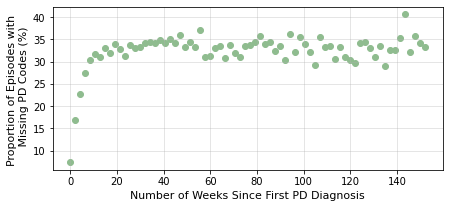

In [16]:

# Graph of errors w/r to TimeDiff between first and subsequent episode
# Using 3 year follow up

df_Plot = df_5.copy()
df_Errors_TimeDiff = df_Plot.groupby(by='TimeDiff_FirstDementia')['Error_Dementia'].agg(['sum', 'count']).reset_index()
df_Errors_TimeDiff.loc[:, 'Prop'] = 100 * (df_Errors_TimeDiff.loc[:, 'sum'] / df_Errors_TimeDiff.loc[:, 'count'])

# Binning previous dataframes in TimeDiff intervals
TimeDiff_Min = 1
TimeDiff_Max = df_Errors_TimeDiff['TimeDiff_FirstDementia'].max()
Interval = 15 # days
N = np.floor( (TimeDiff_Max - TimeDiff_Min) / Interval ) .astype('int')
Sum_List = []
Count_List = []
TimeDiffBin_List = []
for k in range(N):
    Lower_TimeDiff = k*Interval
    Upper_TimeDiff = Lower_TimeDiff+Interval
    Filter_Interval = (df_Errors_TimeDiff['TimeDiff_FirstDementia']>Lower_TimeDiff) & (df_Errors_TimeDiff['TimeDiff_FirstDementia']<=Upper_TimeDiff)
    df_Sub = df_Errors_TimeDiff.loc[Filter_Interval, :]
    
    Sum = df_Sub['sum'].sum()
    Count = df_Sub['count'].sum()
    Sum_List.append(Sum)
    Count_List.append(Count)
    
    TimeDiffBin_List.append(k*Interval/7)
    
    df_TimeDiff_Bins = pd.DataFrame( data = {'TimeDiffBin':TimeDiffBin_List,
                                             'Errors_Sum':Sum_List,
                                             'Patients_Count':Count_List} )
df_TimeDiff_Bins.loc[:, 'Prop'] = 100 * (df_TimeDiff_Bins.loc[:, 'Errors_Sum'] / df_TimeDiff_Bins.loc[:, 'Patients_Count'])
df_TimeDiff_Bins

# Plotting Proportion of Episodes with Errors w/r TimeDiff
fig, ax = plt.subplots(figsize=(7,3))
X = df_TimeDiff_Bins['TimeDiffBin']
Y = df_TimeDiff_Bins['Prop']
plt.scatter(X, Y,
           color='darkseagreen')
plt.grid('on', alpha=0.4)
plt.xlabel('Number of Weeks Since First PD Diagnosis', fontsize=11);
plt.ylabel('Proportion of Episodes with \n Missing PD Codes (%)', fontsize=11);

SaveFig = True
if SaveFig:
    plt.savefig(r"O:\GIRFT DiRAC\FlavienHardy\1_DataConsistency\Figures\PropErrorsTime_Dementia.png",
            bbox_inches='tight', dpi=300)


### Exploration of feature correlation with errors

In [308]:

# Preliminary atatistical analysis
Filter_0 = df_5.loc[:, 'Error_Dementia']==0
df_5.loc[Filter_0, 'TimeDiff_FirstDementia'].describe()

Filter_1 = df_5.loc[:, 'Error_Dementia']==1
df_5.loc[Filter_1, 'TimeDiff_FirstDementia'].describe()


df_5.loc[Filter_0, 'ProvCode_Change'].sum() / df_5.loc[Filter_0, 'ProvCode_Change'].count()
df_5.loc[Filter_1, 'ProvCode_Change'].sum() / df_5.loc[Filter_1, 'ProvCode_Change'].count()

ColumnList = ['TimeDiff_FirstDementia', 'ProvCode_Change', 'region_Change',
              'Missing_Age', 'Missing_IMD_score',
              'ProvCode',
              'Error_Dementia']
df_HM = df_5.loc[:, ColumnList]
df_HM.head()

CorrMatrix = df_HM.corr(method='spearman')
CorrMatrix[['Error_Dementia']].sort_values(by='Error_Dementia', ascending=False)


import scipy.stats as ss
x = df_HM['ProvCode']
y = df_HM['Error_Dementia']
Confusion_Matrix = pd.crosstab(x, y)
chi2 = ss.chi2_contingency(Confusion_Matrix)[0]
n = Confusion_Matrix.sum().sum()
phi2 = chi2/n
r,k = Confusion_Matrix.shape
phi2corr = max( 0, phi2-((k-1)*(r-1))/(n-1) )
rcorr = r-((r-1)**2)/(n-1)
kcorr = k-((k-1)**2)/(n-1)
np.sqrt( phi2corr/min((kcorr-1),(rcorr-1)) )

# Filter = df_trusts.loc[:, 'count']>100
# df_trusts[Filter]


0.1786746659402855

# Errors Across Trusts

,ProvCode,Number of Errors,Number of admitted PD patients,Proportion of Errors (%)
50,RKE,191,403,47.394541
57,RTE,175,407,42.997543
0,REM,767,1833,41.843972
5,RM3,520,1487,34.969738
63,RVR,166,506,32.806324
100,RRF,90,281,32.028470
2,RGT,673,2133,31.551805
74,R0D,150,478,31.380753
103,RA4,85,273,31.135531
23,RRV,305,989,30.839232


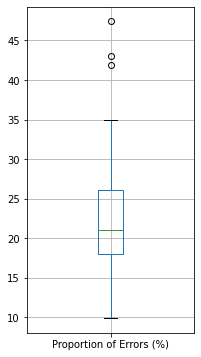

In [307]:

df_6 = df_5.copy()
df_trusts = df_6.groupby(by=['ProvCode'])['Error_Dementia'].agg(['sum', 'count']).sort_values(by=['sum'], ascending=False).reset_index()
df_trusts.loc[:, 'PropErrors'] = 100 * df_trusts.loc[:, 'sum'] / df_trusts.loc[:, 'count']

Filter = df_trusts.loc[:, 'count'] >= 150
df_TrustPlot = df_trusts[Filter]

df_TrustPlot = df_TrustPlot.rename(columns={'sum':'Number of Errors',
                             'count':'Number of admitted PD patients',
                             'PropErrors':'Proportion of Errors (%)'})

df_TrustPlot.boxplot(column='Proportion of Errors (%)', 
                    figsize=(3,6),
                    fontsize=10);
# plt.ylabel('Proportion of Errors in PD Coding (%)')

df_TrustPlot.sort_values(by=['Proportion of Errors (%)'], ascending=False).head(10)


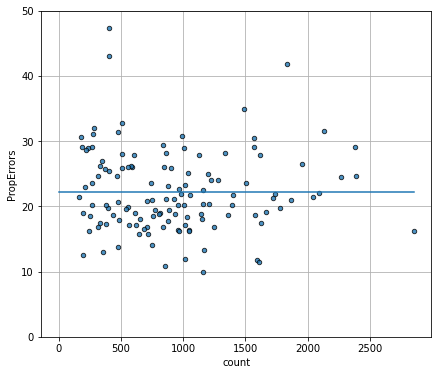

In [245]:

fig, ax = plt.subplots(figsize=(7,6))
X = df_TrustPlot['count']
Y = df_TrustPlot['PropErrors']
ax = sns.scatterplot(data=df_TrustPlot, x=X, y=Y,
                      s=20, alpha=0.8, edgecolor='black', linewidth=0.9, zorder=2)

df_trusts.head()


import funnelpy.funnelpy as fpy
df_sigmas, df_data = fpy.sigmas(groups=df_TrustPlot['ProvCode'],
                               samplesizes=df_TrustPlot['count'],
                               incidents=df_TrustPlot['sum'])

df_data['incident_rates'] = df_data['incident_rates'] * 100
for col in ['lowertwosigma', 'uppertwosigma', 'lowerthreesigma', 'upperthreesigma', 'mean']:
    df_sigmas[col] = df_sigmas[col]*100
# ax = sns.lineplot(data=df_sigmas, x='chart_index', y='lowertwosigma')
# ax = sns.lineplot(data=df_sigmas, x='chart_index', y='uppertwosigma')
# ax = sns.lineplot(data=df_sigmas, x='chart_index', y='lowerthreesigma')
# ax = sns.lineplot(data=df_sigmas, x='chart_index', y='upperthreesigma')
ax = sns.lineplot(data=df_sigmas, x='chart_index', y='mean')

plt.ylim(0, 50);
plt.grid('on')


# Time Evolution of Errors

In [280]:

# Keeping patients with first dementia diagnosis before 2018-03-31, and episodes in following 3 years
Filter_Date = df_4.loc[:, 'EPIend_FirstDementia'] <= pd.to_datetime('2018-03-31', format='%Y-%m-%d')
Filter_FollowUp = df_4.loc[:, 'TimeDiff_FirstDementia'] <= 365*3
df_7 = df_4.loc[Filter_Date & Filter_FollowUp, :]
df_7.head()


,P_Spell_ID,HESID,LSOA_2011_Code,Admission_date,Discharge_date,EPIstart,EPIend,diagnosis_group,Spell_Los,sex,...,Exist_DementiaDiagnosis,Error_Dementia,TimeDiff_FirstDementia,ProvCode_Change,region,region_FirstDementia,region_Change,Missing_Age,IMD Score,Missing_IMD_score
3,8786,0002CF863631188C9524321D4710EF31,E01021334,2014-07-03,2014-07-17,2014-07-03,2014-07-12,N390~U898~N182~G20XD~F023A~K590~R33X~R600~R680...,14,Female,...,1,0,0,0,East of England,East of England,0,0,14.370,0
4,8786,0002CF863631188C9524321D4710EF31,E01021334,2014-07-03,2014-07-17,2014-07-12,2014-07-17,N390~U898~N182~G20XD~F023A~K590~R33X~R600~R680...,14,Female,...,1,0,5,0,East of England,East of England,0,0,14.370,0
5,8787,0002CF863631188C9524321D4710EF31,E01021334,2014-12-15,2015-01-02,2014-12-15,2015-01-02,J690~A419~N179~G20X~D696~I959~N390~E86X~R680~L...,18,Female,...,1,1,174,0,East of England,East of England,0,0,14.370,0
6,8788,0002CF863631188C9524321D4710EF31,E01021334,2015-01-23,2015-01-26,2015-01-23,2015-01-26,J181~N179~E86X~N390~T830~L890~G20X~I10X~M199~F...,3,Female,...,1,1,198,0,East of England,East of England,0,0,14.370,0
7,18075,0005CFF4524423B83400095C9724194C,E01003252,2017-06-25,2017-07-18,2017-06-25,2017-06-26,G20X~F023~M628~N179~N183~C61X~D469~I10X~L97X~M...,23,Male,...,1,0,0,0,London,London,0,0,48.493,0


In [281]:

# Build time-series dataframe for proportions of errors
# --------------------------------------------------
def Build_df_ErrorsTime(df_ini):
    df = df_ini.copy()

    # Evolution of errors according to discharge date of subsequent spell
    DateVariable = 'EPIend'
    DateMin, DateMax = df[DateVariable].min(), df[DateVariable].max()
    Delta = datetime.timedelta(days=7*4)
    N_Intervals = int( np.floor( (DateMax-DateMin)/Delta ) )

    List_DateStart = []
    List_DateEnd = []
    List_Sum = []
    List_Counts = []
    List_Prop = []
    for k in range(N_Intervals):
        DateStart = DateMin + k*Delta
        DateEnd = DateStart + Delta
        Filter_Period = (df.loc[:,DateVariable]>DateStart) & (df.loc[:,DateVariable]<=DateEnd)
        df_Period = df.loc[Filter_Period, :]
        Errors_Sum = df_Period.loc[:, 'Error_Dementia'].sum()
        Count = df_Period.shape[0]
        Prop = 100 * Errors_Sum / Count

        List_DateStart.append(DateStart)
        List_DateEnd.append(DateEnd)
        List_Sum.append(Errors_Sum)
        List_Counts.append(Count)
        List_Prop.append(Prop)

    df_ErrorsTime = pd.DataFrame(data={'DateStart':List_DateStart,
                                       'DateEnd':List_DateEnd,
                                       'Sum':List_Sum,
                                       'Counts':List_Counts,
                                       'Prop':List_Prop})
    return df_ErrorsTime
# --------------------------------------------------

df_ErrorsTime = Build_df_ErrorsTime(df_7)
df_ErrorsTime.head()


,DateStart,DateEnd,Sum,Counts,Prop
0,2011-04-01,2011-04-29,19,409,4.645477
1,2011-04-29,2011-05-27,36,477,7.547170
2,2011-05-27,2011-06-24,56,499,11.222445
3,2011-06-24,2011-07-22,52,507,10.256410
4,2011-07-22,2011-08-19,68,562,12.099644


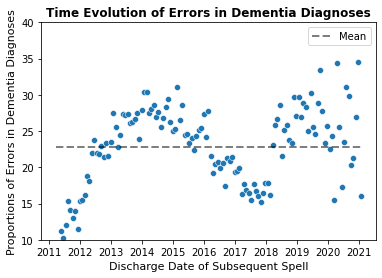

In [283]:

DateVariables = ['DateStart', 'Prop']
X = df_ErrorsTime['DateStart']
Y = df_ErrorsTime['Prop']
sns.scatterplot( x=X, y=Y )
sns.lineplot( x=X, y=Y.mean(),
              linestyle='dashed', color='black', linewidth=2, alpha=0.5,
              zorder=1, label='Mean')

plt.ylim(10, 40);
plt.xlabel('Discharge Date of Subsequent Spell', size=11);
plt.ylabel('Proportions of Errors in Dementia Diagnoses', size=11);
plt.title('Time Evolution of Errors in Dementia Diagnoses', size=12, fontweight='bold');



In [171]:

df_4.loc[:, 'TimeDiff_FirstDementia'].describe()


count    193391.000000
mean        333.203329
std         479.922634
min       -2936.000000
25%           6.000000
50%         118.000000
75%         485.000000
max        3695.000000
Name: TimeDiff_FirstDementia, dtype: float64

# Paper: Table 1

In [ ]:

# File for IMD scores 
FileName = "File_7_ID_2015_All_ranks__deciles_and_scores_for_the_Indices_of_Deprivation__and_population_denominators.csv"
Path = r"O:\GIRFT DiRAC\FlavienHardy\1_DataConsistency\Data\0_Raw"
FilePath = os.path.join(Path, FileName)
df_IMD = pd.read_csv(FilePath)


In [329]:

# Find Unique First Spells
df_DementiaFirst = df_4.sort_values(by=['HESID', 'EPIend']).drop_duplicates(subset=['HESID'], keep='first')

# --------------------------------------------
df_Table1 = df_DementiaFirst # Unique patients, first spells
N_Patients = df_Table1.shape[0]

AgeMin_List = [0, 18, 40, 60, 80] + [999]
AgeMax_List = [age-1 for age in AgeMin_List[1:] ] + [999]
for k in range(len(AgeMin_List)):
    AgeMin = AgeMin_List[k]
    AgeMax = AgeMax_List[k]
    FilterAge = (df_Table1['age_of_patient']>=AgeMin) & (df_Table1['age_of_patient']<=AgeMax)
    
    df_Age = df_Table1.loc[FilterAge, :]
    print('Age band:', AgeMin, '-', AgeMax)
    print('\t Number of patients:', df_Age.shape[0], 'corresponding to %0.2f' % (100*df_Age.shape[0]/df_AgeBands.shape[0]), '%')

print('\n')

# --------------------------------------------
# Sex
Filter_Male = df_Table1['sex']=='Male'
Filter_Female = df_Table1['sex']=='Female'

N_Males = df_Table1[Filter_Male].shape[0]
N_Females = df_Table1[Filter_Female].shape[0]
Missing_Sex = N_Patients - (N_Males + N_Females)
Prop_Males = 100*N_Males/N_Patients
Prop_Females = 100*N_Females/N_Patients
Prop_Missing = 100*Missing_Sex/N_Patients

print('Number of Male patients:', N_Males, 'corresponding to %0.2f' % Prop_Males, '%' )
print('Number of Female patients:', N_Females, 'corresponding to %0.2f' % Prop_Females, '%' )
print('Number of missing sex:', Missing_Sex, 'corresponding to %0.2f' % Prop_Missing, '%' )

print('\n')
# --------------------------------------------
# Deprivation Quintile
ColumnList = ['LSOA code (2011)', 'Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)']
df_IMD_Sub = df_IMD[ColumnList]

df_Table1 = pd.merge(df_Table1, df_IMD_Sub, left_on='LSOA_2011_Code', right_on='LSOA code (2011)', how='left')
df_Table1 = df_Table1.drop(columns=['LSOA code (2011)'])
df_Table1 = df_Table1.rename(columns={'Index of Multiple Deprivation (IMD) Decile (where 1 is most deprived 10% of LSOAs)':'IMD Deciles'})
df_Table1.head()

Decile_List = range(1,10+1)
for k in range(5):
    Decile_Max = Decile_List[k]*2
    Decile_Min = Decile_Max-1

    Filter_Quintiles = (df_Table1["IMD Deciles"]>=Decile_Min) & (df_Table1["IMD Deciles"]<=Decile_Max)
    N_Patients_Quintile = df_Table1[Filter_Quintiles].shape[0]
    Prop = 100*N_Patients_Quintile/N_Patients
    print('IMD Deciles:', Decile_Min, '-', Decile_Max)
    print('\t Number of patients:', N_Patients_Quintile, 'corresponding to %0.2f' % Prop, '%')

N_MissingIMD = df_Table1["IMD Deciles"].isnull().sum()
Prop_Missing = 100*N_MissingIMD/N_Patients
print('Number of missing IMD:', N_MissingIMD, 'corresponding to %0.2f' % Prop_Missing, '%')

print('\n')
# --------------------------------------------
# Number of readmissions
df_Count = df_4.copy()
df_UniqueSpells = df_Count.sort_values(by=['HESID', 'EPIend']).drop_duplicates(subset=['P_Spell_ID'], keep='first')[['HESID','P_Spell_ID']]
df_NumberSpells = df_UniqueSpells.groupby(by='HESID').agg('count').reset_index().rename(columns={'P_Spell_ID':'Number Spells'})
df_NumberSpells.loc[:, 'Number Readmissions'] = df_NumberSpells.loc[:, 'Number Spells']-1
Readmissions_Describe = df_NumberSpells['Number Readmissions'].describe()
print('Number of readmissions:', Readmissions_Describe['50%'], '(', Readmissions_Describe['25%'], '-', Readmissions_Describe['75%'], ')')

SaveCSV = True
if SaveCSV:
    df_NumberSpells.to_csv(r'O:\GIRFT DiRAC\FlavienHardy\1_DataConsistency\Data\1_Processed\Fig1_dementia_NumberReadmissions.csv')
    

Age band: 0 - 17
	 Number of patients: 0 corresponding to 0.00 %
Age band: 18 - 39
	 Number of patients: 14 corresponding to 0.04 %
Age band: 40 - 59
	 Number of patients: 301 corresponding to 0.95 %
Age band: 60 - 79
	 Number of patients: 14149 corresponding to 44.58 %
Age band: 80 - 998
	 Number of patients: 17234 corresponding to 54.30 %
Age band: 999 - 999
	 Number of patients: 42 corresponding to 0.13 %


Number of Male patients: 20493 corresponding to 64.57 %
Number of Female patients: 11241 corresponding to 35.42 %
Number of missing sex: 6 corresponding to 0.02 %


IMD Deciles: 1 - 2
	 Number of patients: 4165 corresponding to 13.12 %
IMD Deciles: 3 - 4
	 Number of patients: 4939 corresponding to 15.56 %
IMD Deciles: 5 - 6
	 Number of patients: 5496 corresponding to 17.32 %
IMD Deciles: 7 - 8
	 Number of patients: 5799 corresponding to 18.27 %
IMD Deciles: 9 - 10
	 Number of patients: 5580 corresponding to 17.58 %
Number of missing IMD: 5761 corresponding to 18.15 %


Number of 

# Figure 2: Number of Admissions for 3 year follow-up

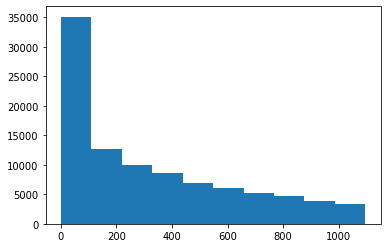

In [335]:

# 3-year follow-up period since first admission, for each patient
df_Fig2 = df_5.copy()
Filter_Read = df_Fig2.loc[:, 'TimeDiff_FirstDementia']>0
df_Read = df_Fig2.loc[Filter_Read, :]
df_Read.head()

plt.hist( df_Read['TimeDiff_FirstDementia'] );
